In [1]:
import pandas as pd
import os, sys
%matplotlib inline

from IPython.display import display, HTML

if (sys.version_info < (3, 0)):
    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
working_dir = r'../../../../outputs/agg/dash'
fname = 'tour_purpose_mode'
index_map = {0:'Other',1:'City of SeTac'}

In [3]:
def load_data(fname):
    """ open and join model and survey data """

    df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
    df_model['source'] = 'model'
    df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
    df_survey['source'] = 'survey'
    df = df_model.append(df_survey)

    return df

# Primary Tour Mode Share

In [4]:
pd.options.display.float_format = '{:,.1%}'.format

df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
df_model = (df_model.groupby('tmodetp').sum()[['toexpfac']]/df_model['toexpfac'].sum()).reset_index()
df_survey = (df_survey.groupby('tmodetp').sum()[['toexpfac']]/df_survey['toexpfac'].sum()).reset_index()
df = df_model.merge(df_survey, on='tmodetp', suffixes=['_model','_survey'], how = 'outer')
df.columns = ['Tour Mode',' Model',' Survey']
df.index = df['Tour Mode']
df.drop('Tour Mode', axis=1, inplace=True)
df

,Model,Survey
Tour Mode,,
Bike,1.3%,0.7%
HOV2,24.0%,22.8%
HOV3+,21.2%,24.4%
Park,0.6%,0.6%
SOV,34.7%,32.7%
School Bus,3.0%,2.4%
TNC,1.5%,0.4%
Transit,3.6%,5.7%
Walk,10.0%,9.6%


<AxesSubplot:ylabel='Tour Mode'>

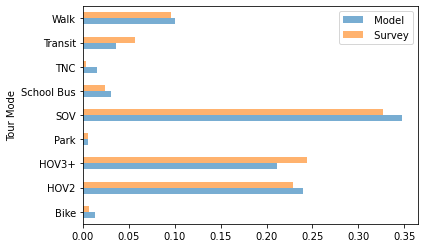

In [5]:
df.plot(kind='barh', alpha=0.6)

# Primary Tour Mode Share - City of SeaTac

In [6]:
df_model_seatac = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
df_survey_seatac = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))

df_model_seatac = df_model_seatac[df_model_seatac['person_subarea'] == 1]
df_survey_seatac = df_survey_seatac[df_survey_seatac['person_subarea'] == 1]

df_model_seatac = (df_model_seatac.groupby('tmodetp').sum()[['toexpfac']]/df_model_seatac['toexpfac'].sum()).reset_index()
df_survey_seatac = (df_survey_seatac.groupby('tmodetp').sum()[['toexpfac']]/df_survey_seatac['toexpfac'].sum()).reset_index()
df = df_model_seatac.merge(df_survey_seatac, on='tmodetp', suffixes=['_model','_survey'], how = 'outer')
df.columns = ['Tour Mode',' Model',' Survey']
df.index = df['Tour Mode']
df.drop('Tour Mode', axis=1, inplace=True)
df

,Model,Survey
Tour Mode,,
Bike,1.1%,6.3%
HOV2,24.6%,48.8%
HOV3+,23.6%,8.2%
Park,0.5%,0.0%
SOV,33.0%,21.5%
School Bus,3.1%,NaN
TNC,1.3%,NaN
Transit,5.9%,12.3%
Walk,6.8%,2.8%


<AxesSubplot:ylabel='Tour Mode'>

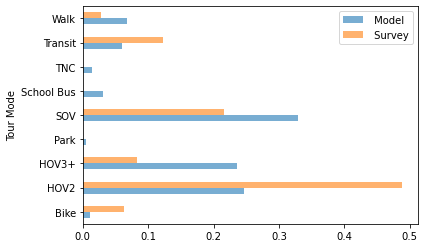

In [7]:
df.plot(kind='barh', alpha=0.6)

# Work Tour Mode Share

In [8]:
pd.options.display.float_format = '{:,.1%}'.format

df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
df_model = df_model[df_model['pdpurp'] == 'Work']
df_survey = df_survey[df_survey['pdpurp'] == 'Work']
df_model = (df_model.groupby('tmodetp').sum()[['toexpfac']]/df_model['toexpfac'].sum()).reset_index()
df_survey = (df_survey.groupby('tmodetp').sum()[['toexpfac']]/df_survey['toexpfac'].sum()).reset_index()
df = df_model.merge(df_survey, on='tmodetp', suffixes=['_model','_survey'], how = 'outer')
df.columns = ['Tour Mode',' Model',' Survey']
df.index = df['Tour Mode']
df.drop('Tour Mode', axis=1, inplace=True)
df

,Model,Survey
Tour Mode,,
Bike,1.4%,1.0%
HOV2,16.0%,14.0%
HOV3+,8.0%,10.4%
Park,2.3%,1.6%
SOV,60.2%,56.2%
TNC,1.0%,0.6%
Transit,7.2%,11.0%
Walk,4.0%,4.5%
School Bus,NaN,0.0%


<AxesSubplot:ylabel='Tour Mode'>

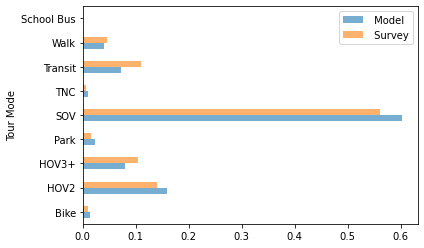

In [9]:
df.plot(kind='barh', alpha=0.6)

# Work Tour Mode Share - City of SeaTac

In [10]:
df_model_seatac = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
df_survey_seatac = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))

df_model_seatac = df_model_seatac[df_model_seatac['person_subarea'] == 1]
df_survey_seatac = df_survey_seatac[df_survey_seatac['person_subarea'] == 1]

df_model_seatac = df_model_seatac[df_model_seatac['pdpurp'] == 'Work']
df_survey_seatac = df_survey_seatac[df_survey_seatac['pdpurp'] == 'Work']
df_model_seatac = (df_model_seatac.groupby('tmodetp').sum()[['toexpfac']]/df_model_seatac['toexpfac'].sum()).reset_index()
df_survey_seatac = (df_survey_seatac.groupby('tmodetp').sum()[['toexpfac']]/df_survey_seatac['toexpfac'].sum()).reset_index()
df = df_model_seatac.merge(df_survey_seatac, on='tmodetp', suffixes=['_model','_survey'], how = 'outer')
df.columns = ['Tour Mode',' Model',' Survey']
df.index = df['Tour Mode']
df.drop('Tour Mode', axis=1, inplace=True)
df

,Model,Survey
Tour Mode,,
Bike,1.2%,1.1%
HOV2,16.9%,34.9%
HOV3+,8.6%,0.1%
Park,2.0%,NaN
SOV,57.1%,36.3%
TNC,0.9%,NaN
Transit,12.1%,27.6%
Walk,1.2%,NaN


<AxesSubplot:ylabel='Tour Mode'>

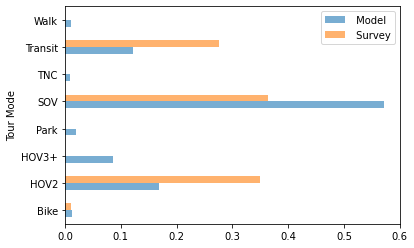

In [11]:
df.plot(kind='barh', alpha=0.6)

# School Tour Mode Share

In [12]:
pd.options.display.float_format = '{:,.1%}'.format

df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
df_model = df_model[df_model['pdpurp'] == 'School']
df_survey = df_survey[df_survey['pdpurp'] == 'School']
df_model = (df_model.groupby('tmodetp').sum()[['toexpfac']]/df_model['toexpfac'].sum()).reset_index()
df_survey = (df_survey.groupby('tmodetp').sum()[['toexpfac']]/df_survey['toexpfac'].sum()).reset_index()
df = df_model.merge(df_survey, on='tmodetp', suffixes=['_model','_survey'], how = 'outer')
df.columns = ['Tour Mode',' Model',' Survey']
df.index = df['Tour Mode']
df.drop('Tour Mode', axis=1, inplace=True)
df

,Model,Survey
Tour Mode,,
Bike,3.3%,0.4%
HOV2,19.1%,13.6%
HOV3+,29.5%,41.4%
SOV,7.3%,8.0%
School Bus,27.7%,20.0%
TNC,3.4%,0.4%
Transit,4.8%,8.0%
Walk,4.9%,6.4%
Park,NaN,0.6%


<AxesSubplot:ylabel='Tour Mode'>

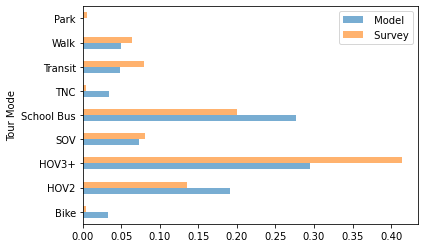

In [13]:
df.plot(kind='barh', alpha=0.6)

# School Tour Mode Share - City of SeaTac

In [14]:
df_model_seatac = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
df_survey_seatac = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))

df_model_seatac = df_model_seatac[df_model_seatac['person_subarea'] == 1]
df_survey_seatac = df_survey_seatac[df_survey_seatac['person_subarea'] == 1]

df_model_seatac = df_model_seatac[df_model_seatac['pdpurp'] == 'School']
df_survey_seatac = df_survey_seatac[df_survey_seatac['pdpurp'] == 'School']
df_model_seatac = (df_model_seatac.groupby('tmodetp').sum()[['toexpfac']]/df_model_seatac['toexpfac'].sum()).reset_index()
df_survey_seatac = (df_survey_seatac.groupby('tmodetp').sum()[['toexpfac']]/df_survey_seatac['toexpfac'].sum()).reset_index()
df = df_model_seatac.merge(df_survey_seatac, on='tmodetp', suffixes=['_model','_survey'], how = 'outer')
df.columns = ['Tour Mode',' Model',' Survey']
df.index = df['Tour Mode']
df.drop('Tour Mode', axis=1, inplace=True)
df

,Model,Survey
Tour Mode,,
Bike,2.6%,NaN
HOV2,19.6%,51.3%
HOV3+,29.8%,48.7%
SOV,5.9%,NaN
School Bus,28.0%,NaN
TNC,3.3%,NaN
Transit,6.5%,NaN
Walk,4.4%,NaN


<AxesSubplot:ylabel='Tour Mode'>

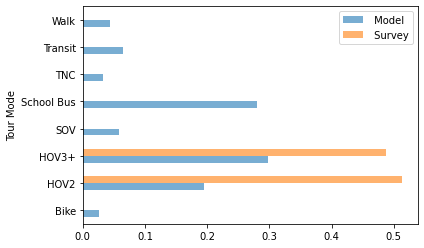

In [15]:
df.plot(kind='barh', alpha=0.6)

# Escort Tour Mode Share

In [16]:
pd.options.display.float_format = '{:,.1%}'.format

df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
df_model = df_model[df_model['pdpurp'] == 'Escort']
df_survey = df_survey[df_survey['pdpurp'] == 'Escort']
df_model = (df_model.groupby('tmodetp').sum()[['toexpfac']]/df_model['toexpfac'].sum()).reset_index()
df_survey = (df_survey.groupby('tmodetp').sum()[['toexpfac']]/df_survey['toexpfac'].sum()).reset_index()
df = df_model.merge(df_survey, on='tmodetp', suffixes=['_model','_survey'], how = 'outer')
df.columns = ['Tour Mode',' Model',' Survey']
df.index = df['Tour Mode']
df.drop('Tour Mode', axis=1, inplace=True)
df

,Model,Survey
Tour Mode,,
Bike,2.2%,0.2%
HOV2,43.5%,44.2%
HOV3+,48.0%,46.1%
SOV,2.3%,4.9%
TNC,0.1%,0.0%
Transit,0.0%,0.3%
Walk,3.9%,3.7%
School Bus,NaN,0.2%


<AxesSubplot:ylabel='Tour Mode'>

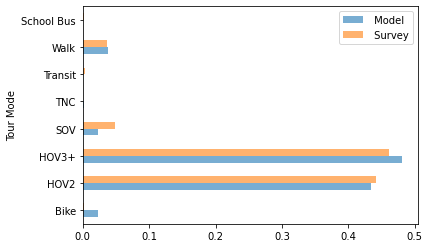

In [17]:
df.plot(kind='barh', alpha=0.6)

# Escort Tour Mode Share - City of SeaTac

In [18]:
df_model_seatac = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
df_survey_seatac = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))

df_model_seatac = df_model_seatac[df_model_seatac['person_subarea'] == 1]
df_survey_seatac = df_survey_seatac[df_survey_seatac['person_subarea'] == 1]

df_model_seatac = df_model_seatac[df_model_seatac['pdpurp'] == 'Escort']
df_survey_seatac = df_survey_seatac[df_survey_seatac['pdpurp'] == 'Escort']
df_model_seatac = (df_model_seatac.groupby('tmodetp').sum()[['toexpfac']]/df_model_seatac['toexpfac'].sum()).reset_index()
df_survey_seatac = (df_survey_seatac.groupby('tmodetp').sum()[['toexpfac']]/df_survey_seatac['toexpfac'].sum()).reset_index()
df = df_model_seatac.merge(df_survey_seatac, on='tmodetp', suffixes=['_model','_survey'], how = 'outer')
df.columns = ['Tour Mode',' Model',' Survey']
df.index = df['Tour Mode']
df.drop('Tour Mode', axis=1, inplace=True)
df

,Model,Survey
Tour Mode,,
Bike,2.1%,NaN
HOV2,37.8%,100.0%
HOV3+,55.3%,NaN
SOV,1.6%,NaN
TNC,0.1%,NaN
Transit,0.0%,NaN
Walk,3.1%,NaN


<AxesSubplot:ylabel='Tour Mode'>

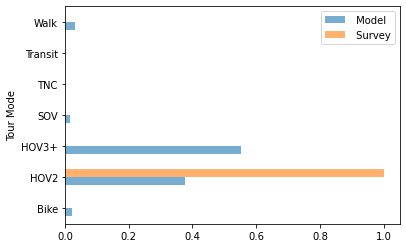

In [19]:
df.plot(kind='barh', alpha=0.6)

# Other Tour Mode Share

In [20]:
pd.options.display.float_format = '{:,.1%}'.format

df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
df_model = df_model[-df_model['pdpurp'].isin(['School','Work','Escort'])]
df_survey = df_survey[-df_survey['pdpurp'].isin(['School','Work','Escort'])]
df_model = (df_model.groupby('tmodetp').sum()[['toexpfac']]/df_model['toexpfac'].sum()).reset_index()
df_survey = (df_survey.groupby('tmodetp').sum()[['toexpfac']]/df_survey['toexpfac'].sum()).reset_index()
df = df_model.merge(df_survey, on='tmodetp', suffixes=['_model','_survey'], how = 'outer')
df.columns = ['Tour Mode',' Model',' Survey']
df.index = df['Tour Mode']
df.drop('Tour Mode', axis=1, inplace=True)
df

,Model,Survey
Tour Mode,,
Bike,0.7%,0.8%
HOV2,24.9%,26.2%
HOV3+,20.3%,25.3%
SOV,34.5%,28.9%
TNC,1.7%,0.2%
Transit,2.2%,3.0%
Walk,15.6%,14.5%
Park,NaN,0.1%
School Bus,NaN,0.6%


<AxesSubplot:ylabel='Tour Mode'>

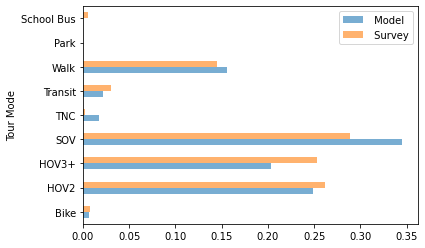

In [21]:
df.plot(kind='barh', alpha=0.6)

# Other Tour Mode Share - City of SeaTac

In [22]:
df_model_seatac = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
df_survey_seatac = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))

df_model_seatac = df_model_seatac[df_model_seatac['person_subarea'] == 1]
df_survey_seatac = df_survey_seatac[df_survey_seatac['person_subarea'] == 1]

df_model_seatac = df_model_seatac[-df_model_seatac['pdpurp'].isin(['School','Work','Escort'])]
df_survey_seatac = df_survey_seatac[-df_survey_seatac['pdpurp'].isin(['School','Work','Escort'])]
df_model_seatac = (df_model_seatac.groupby('tmodetp').sum()[['toexpfac']]/df_model_seatac['toexpfac'].sum()).reset_index()
df_survey_seatac = (df_survey_seatac.groupby('tmodetp').sum()[['toexpfac']]/df_survey_seatac['toexpfac'].sum()).reset_index()
df = df_model_seatac.merge(df_survey_seatac, on='tmodetp', suffixes=['_model','_survey'], how = 'outer')
df.columns = ['Tour Mode',' Model',' Survey']
df.index = df['Tour Mode']
df.drop('Tour Mode', axis=1, inplace=True)
df

,Model,Survey
Tour Mode,,
Bike,0.5%,11.7%
HOV2,26.8%,54.6%
HOV3+,22.8%,8.5%
SOV,33.3%,15.7%
TNC,1.5%,NaN
Transit,3.9%,4.0%
Walk,11.2%,5.5%
Park,NaN,0.1%


<AxesSubplot:ylabel='Tour Mode'>

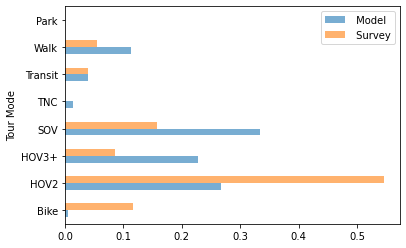

In [23]:
df.plot(kind='barh', alpha=0.6)